## Data summary

- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Process 
Feature Engineering 

1. EDA(Exploratory Data Analysis) 
- 1)Numerical features are there
- 2) categorical? 
- 3)missing value(visualize) 
- 4)outliers(boxplot) 
- 5) creaning 

2. Handling the missing value

3. Handling imbalance 

4. testing outlier

5. scaling 

6. converting categorical to numerical 

7. Feature selection


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
import statistics
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import ttest_1samp

from sklearn.preprocessing import StandardScaler

%matplotlib inline 
pd.pandas.set_option("display.max_columns", None)
pd.pandas.set_option("display.max_rows", None)

os.listdir()

['Taitanic.ipynb',
 'test.csv',
 'train.csv',
 '.ipynb_checkpoints',
 'gender_submission.csv']

# Explore

In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [3]:
print("train_df:", train_df.shape)
print("test_df:", test_df.shape)

train_df: (891, 12)
test_df: (418, 11)


In [4]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Handle Missing values

In [8]:
nal_features = [feature for feature in train_df.columns if train_df[feature].isna().sum() > 0]
for feature in nal_features:
    print(f"{feature} has {train_df[feature].isna().mean():.3}% missing values")

Age has 0.199% missing values
Cabin has 0.771% missing values
Embarked has 0.00224% missing values


In [9]:
# check nullvalue containing dataset
for feature in nal_features:
    print(feature)
    print(train_df[feature].unique())
    display(train_df[train_df[feature].isna()].head())

Age
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


Cabin
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Embarked
['S' 'C' 'Q' nan]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Age
Age has 0.199% missing values

In [10]:
# Age data
train_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

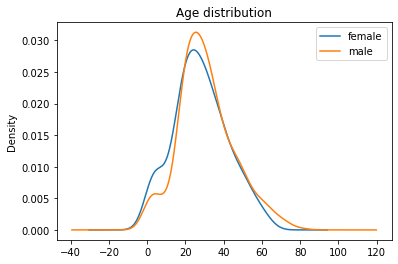

In [11]:
fig = plt.figure()
ax = fig.add_subplot()
train_df.groupby("Sex").Age.plot(kind="kde", ax=ax, legend=True, title = "Age distribution")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

In [12]:
def create_nan_col(df, col):
    train_df[col+"_na"] = np.where(train_df[col].isna(), 1, 0)

In [13]:
# create missing age column
create_nan_col(train_df, "Age")
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [14]:
def impute_random(df, col):
    # get total number of the missing values
    num_missing = train_df[col].isna().sum()
    # get randome sample
    sample = train_df[col].dropna().sample(num_missing, random_state=42)
    # assign index to the sample
    sample.index = train_df[col][train_df[col].isna()].index
    # fill the missing values with the sampele
    train_df.loc[train_df[col].isna(), col]= sample

In [15]:
impute_random(train_df, "Age")

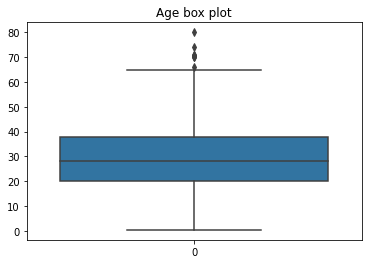

In [16]:
plt.title("Age box plot")
sns.boxplot(data = train_df.Age)
plt.show()

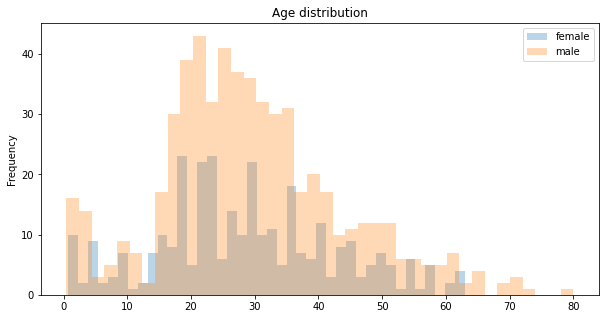

In [17]:
plt.figure(figsize = (10, 5))
plt.title("Age distribution")
train_df.groupby("Sex").Age.plot.hist(bins=40, alpha = 0.3, legend = True)
plt.show()

In [18]:
def calc_survive_ratio(df, col, inplace = False):
    data = pd.DataFrame(df.groupby(col)["Survived"].mean())
    data["Died"] = 1 - data["Survived"]
    data[col+"_Survied_ratio"] = data["Survived"]/data["Died"]
    if inplace:
        df[col+"_Survied_ratio"] = df[col].map(data[col+"_Survied_ratio"].to_dict())
        return df
    return data

In [19]:
calc_survive_ratio(train_df, "Sex")

,Survived,Died,Sex_Survied_ratio
Sex,,,
female,0.742038,0.257962,2.876543
male,0.188908,0.811092,0.232906


Women more survived than men

### Cabin
Cabin has 0.771% missing values

In [20]:
# creating cabin null column
create_nan_col(train_df, "Cabin")
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na,Cabin_na
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1


In [21]:
train_df.Cabin.fillna("Missing", inplace = True)
train_df.Cabin = train_df.Cabin.astype(str).str[0]
train_df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

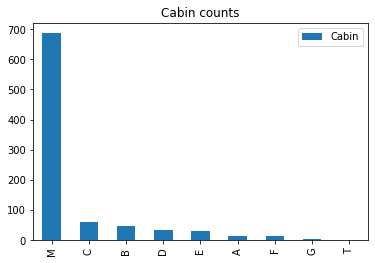

In [22]:
pd.DataFrame(train_df.Cabin.value_counts()).plot.bar(title="Cabin counts")
plt.show()

In [23]:
calc_survive_ratio(train_df, "Cabin")

,Survived,Died,Cabin_Survied_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


### Embarked
Embarked has 0.00224% missing values

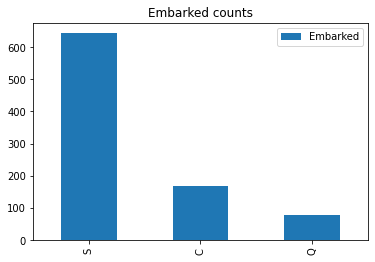

In [24]:
pd.DataFrame(train_df.Embarked.value_counts()).plot.bar(title = 'Embarked counts')
plt.show()

In [25]:
create_nan_col(train_df, "Embarked")

In [26]:
def impute_nan(df, variable, represent):
    train_df[variable].fillna(represent, inplace = True)

In [27]:
mode = train_df["Embarked"].mode()[0]
impute_nan(train_df, "Embarked", mode)

## Feature engineering

In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na,Cabin_na,Embarked_na
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0,1,0


In [29]:
name_counts = pd.DataFrame(train_df["Name"].apply(lambda x: x.split(" ")[1]).value_counts())
name_counts[:10]

,Name
Mr.,502
Miss.,179
Mrs.,121
Master.,40
Dr.,7
Rev.,6
y,4
"Planke,",3
"Impe,",3
"Gordon,",2


In [30]:
def fun(x):
    title_list = ['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.']
    if x not in title_list:
        return "Rare"
    else:
        return x


In [31]:
train_df.Name = pd.DataFrame(train_df["Name"].apply(lambda x: x.split(" ")[1]))
train_df.Name = train_df.Name.apply(fun)

In [32]:
train_df.groupby("Pclass", as_index = False).Survived.mean().sort_values("Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


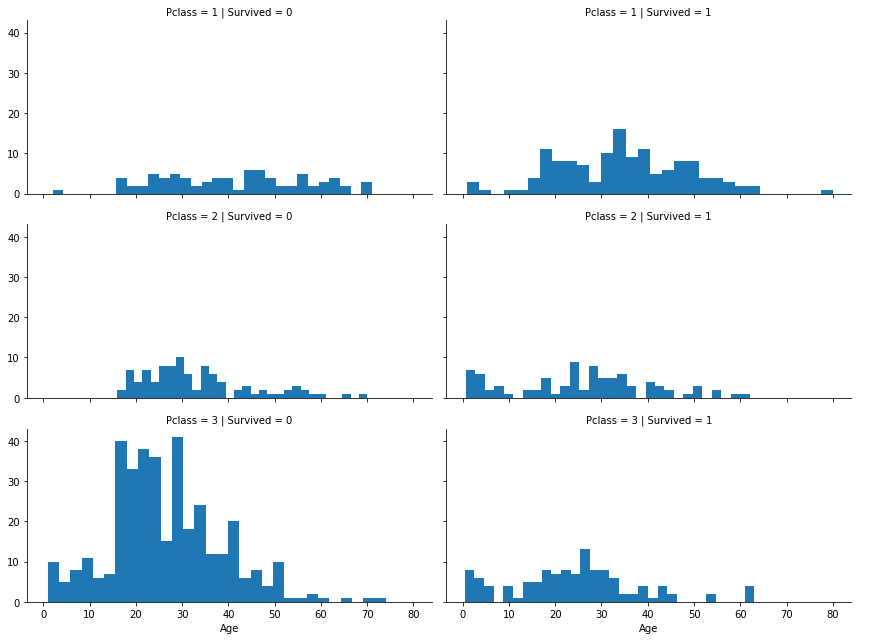

In [33]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", size = 3, aspect = 2)
g.map(plt.hist, "Age", bins = 30)
g.add_legend()
plt.show()

In [34]:
train_df.groupby("Embarked", as_index = False).Survived.mean().sort_values("Survived", ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [35]:
# parch # of parents / children aboard the Titanic
train_df.groupby("Parch", as_index = False).Survived.mean().sort_values("Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [36]:
# sibsp # of siblings / spouses aboard the Titanic
train_df.groupby("SibSp", as_index = False).Survived.mean().sort_values("Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [37]:
train_df["Family"] = train_df["SibSp"] + train_df["Parch"]

In [38]:
train_df.groupby("Family", as_index = False).Survived.mean().sort_values("Survived", ascending = False)

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [39]:
train_df.groupby("Survived").Age.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,29.839709,13.781857,1.00,21.0,28.0,38.0,74.0
1,342.0,28.744649,15.079123,0.42,19.0,28.0,38.0,80.0


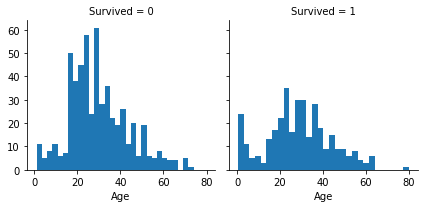

In [40]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(plt.hist, "Age", bins=30)

In [41]:
train_df.drop("Ticket", axis = 1, inplace = True)
train_df.drop("PassengerId", axis = 1, inplace = True)

In [45]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_na,Cabin_na,Embarked_na,Family,Cabin_encoded
0,0,3,Mr.,male,22.0,1,0,7.2500,M,S,0,1,0,1,0.428274
1,1,1,Mrs.,female,38.0,1,0,71.2833,C,C,0,0,0,1,1.458333
2,1,3,Miss.,female,26.0,0,0,7.9250,M,S,0,1,0,0,0.428274
3,1,1,Mrs.,female,35.0,1,0,53.1000,C,S,0,0,0,1,1.458333
4,0,3,Mr.,male,35.0,0,0,8.0500,M,S,0,1,0,0,0.428274


In [46]:
def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    outlier = []
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outlier.append(i)
    return outlier

In [47]:
df = train_df.copy()
def detect_outliers(df, col):
    threshold = 3
    mean = np.mean(df[col])
    std = np.std(df[col])
    df[col+"_outlier"] = np.where(np.abs((df[col] - mean)/std) > threshold, 1, 0)
            
    return df

detect_outliers(df, "Age")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_na,Cabin_na,Embarked_na,Family,Cabin_encoded,Age_outlier
0,0,3,Mr.,male,22.00,1,0,7.2500,M,S,0,1,0,1,0.428274,0
1,1,1,Mrs.,female,38.00,1,0,71.2833,C,C,0,0,0,1,1.458333,0
2,1,3,Miss.,female,26.00,0,0,7.9250,M,S,0,1,0,0,0.428274,0
3,1,1,Mrs.,female,35.00,1,0,53.1000,C,S,0,0,0,1,1.458333,0
4,0,3,Mr.,male,35.00,0,0,8.0500,M,S,0,1,0,0,0.428274,0
5,0,3,Mr.,male,42.00,0,0,8.4583,M,Q,1,1,0,0,0.428274,0
6,0,1,Mr.,male,54.00,0,0,51.8625,E,S,0,0,0,0,3.000000,0
7,0,3,Master.,male,2.00,3,1,21.0750,M,S,0,1,0,4,0.428274,0
8,1,3,Mrs.,female,27.00,0,2,11.1333,M,S,0,1,0,2,0.428274,0
9,1,2,Mrs.,female,14.00,1,0,30.0708,M,C,0,1,0,1,0.428274,0


In [48]:
train_df.groupby("Cabin")[["Cabin","Survived"]].mean().head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [49]:
df = train_df.groupby("Cabin")[["Cabin","Survived"]].mean()
df["Died"] = 1 - df["Survived"]
df["Survive_percent"] = df["Survived"]/df["Died"]

In [50]:
train_df["Cabin_encoded"] = train_df["Cabin"].map(df["Survive_percent"].to_dict())

In [54]:
categories = ["Name", "Sex", "Cabin", "Embarked"]
pd.get_dummies(train_df[categories], )

,Name_Dr.,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Rare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
7,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
8,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
9,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
